In [3]:
import pandas as pd
import itertools
import numpy as np
import statistics
from scipy import stats

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [4]:
bite = pd.read_csv('data/DOHMH_Dog_Bite_Data.csv').dropna()

In [5]:
bite

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 02 2015,DOG,"Poodle, Standard",3,M,True,Brooklyn,11238
3,4,January 01 2015,DOG,American Pit Bull Terrier/Pit Bull,6,M,False,Brooklyn,11221
4,5,January 03 2015,DOG,American Pit Bull Terrier/Pit Bull,1,M,False,Brooklyn,11207
5,6,January 05 2015,DOG,American Pit Bull Terrier/Pit Bull,1,F,False,Brooklyn,11209
6,7,January 04 2015,DOG,MORKIE,1,M,False,Brooklyn,11220
...,...,...,...,...,...,...,...,...,...
10269,10270,December 14 2017,DOG,Maltese,3,M,False,Staten Island,10304
10274,10275,December 21 2017,DOG,Pit Bull,1,M,False,Staten Island,10303
10275,10276,December 24 2017,DOG,CHIWEENIE MIX,7,M,True,Staten Island,10303
10276,10277,December 24 2017,DOG,DUNKER,5,F,True,Staten Island,10303


In [6]:
dogs = bite["Breed"]

In [7]:
breeds = dogs.value_counts(sort=True).head(15).to_dict()

In [8]:
breed = []
num_bite = []

In [9]:
for key, value in breeds.items():
    breed.append(key)
    num_bite.append(value)

In [10]:
y_pos = np.arange(len(breed))

Text(0.5, 1.0, 'Top 15 Total Bites \n per Dog Breed')

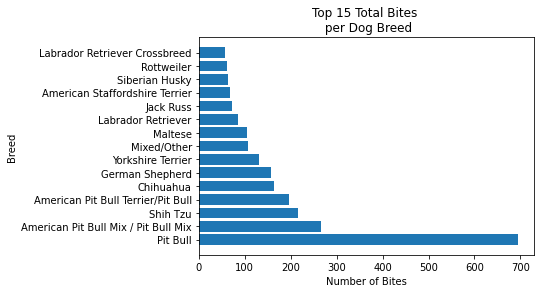

In [11]:
pp.barh(y_pos, num_bite, align='center')
pp.yticks(y_pos, breed)
pp.ylabel("Breed")
pp.xlabel('Number of Bites')
pp.title("Top 15 Total Bites \n per Dog Breed")

In [12]:
# Finding the raito of dog bites per genders

In [13]:
Genders = bite['Gender'].replace(['U','M','F'],['Unkown','Male','Female'])
Genders = Genders.value_counts().to_dict()

In [14]:
gen = []
counts = []
colors = ["orange","pink","cyan"]

In [15]:
for key, value in Genders.items():
    gen.append(key)
    counts.append(value)

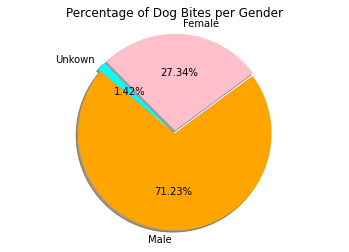

In [16]:
pp.pie(counts, explode=(0,0.03,0.03), labels=gen, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)

pp.axis('equal')
pp.title("Percentage of Dog Bites per Gender")
pp.show()

In [17]:
# Drop the unknown value for gender

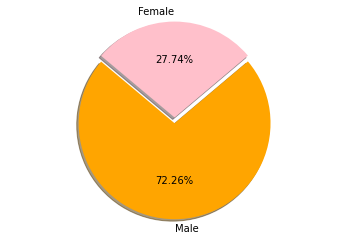

In [18]:
pp.pie(counts[:2], explode=(0.03,0.03), labels=gen[:2], colors=colors[:2], autopct='%1.2f%%', shadow=True, startangle=140)

pp.axis('equal')
#pp.title("Percentage of Dog Bites per Gender", bbox={'facecolor':'.9', 'pad':0.9})
pp.show()

In [19]:
# What is the percentage of dogs that are spayed/neutered?

In [20]:
sn = bite['SpayNeuter'].value_counts().to_dict()

In [21]:
sp_ne= []
count = []

for key, value in sn.items():
    sp_ne.append(key)
    count.append(value)

y_pos = np.arange(len(sp_ne))

Text(0.5, 1.0, 'The Total of Dogs Spayed or neutered ')

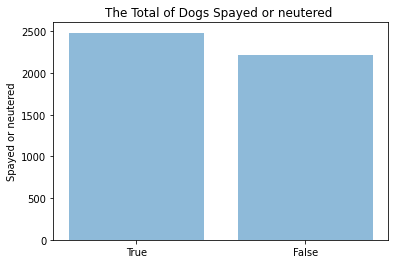

In [22]:
pp.bar(y_pos, count, align='center', alpha=0.5)
pp.xticks(y_pos, sp_ne)
pp.ylabel('Spayed or neutered')
pp.title("The Total of Dogs Spayed or neutered ")

In [23]:
# See if there is relationship with the age of the dog and the number of bites committed

In [24]:
age = bite["Age"].value_counts().to_dict()

In [25]:
# Dropping some dirty data

In [26]:
age = dict(itertools.islice(age.items(), 14))

In [27]:
age

{'2': 703,
 '3': 625,
 '1': 569,
 '4': 480,
 '5': 446,
 '6': 333,
 '7': 277,
 '8': 235,
 '9': 137,
 '10': 135,
 '11': 80,
 '12': 59,
 '13': 52,
 '14': 29}

In [28]:
ages = []
num_bites = []

for key, val in age.items():
    ages.append(int(key))
    num_bites.append(val)


slope, intercept, r, p, std_err = stats.linregress(num_bites, ages)

def myfunc(num_bites):
  return slope * num_bites + intercept
    
mymodel = list(map(myfunc, num_bites))


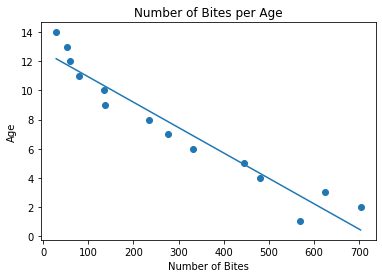

The result: -0.9646261735646148 indicates a very good relationship.


In [29]:
pp.title('Number of Bites per Age')
pp.xlabel('Number of Bites')
pp.ylabel('Age')
pp.scatter(num_bites, ages)
pp.plot(num_bites, mymodel)
pp.show() 
print("The result:",r,"indicates a very good relationship.")